In [35]:
from bs4 import BeautifulSoup, SoupStrainer
import requests
import urllib.request
import copy
import pandas as pd
from newspaper import Article
import re
import nltk
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords
import string
import pandas as pd
import re 
path='fake/'
path_real='real/'

In [36]:
d1 = pd.read_csv(path+'dataset1.csv',on_bad_lines='skip',sep='\t')
d2= pd.read_csv(path+'dataset2.csv',on_bad_lines='skip',sep='\t')
d3 = pd.read_csv(path+'dataset3.csv',on_bad_lines='skip',sep='\t')
d4 = pd.read_csv(path+'dataset6.csv')
d5 = pd.read_csv(path+'dataset7.csv')

In [37]:
d=pd.DataFrame()
d=pd.concat([d,d1]).reset_index(drop=True)
d=pd.concat([d,d2]).reset_index(drop=True)
d=pd.concat([d,d3]).reset_index(drop=True)
d=pd.concat([d,d4]).reset_index(drop=True)
d=pd.concat([d,d5]).reset_index(drop=True)
d=d.head(400)
d.to_csv('dataset_fake.csv', encoding='utf-8', index=False)

In [38]:
# но всёравно надо доудалять руками
y= pd.read_csv('dataset_fake.csv')
pat="[0-9!#$%&'()*+/:;<=>?@[\]^_`{|}~—\"\-]+"
for i in range (0, len(y['News'])):
    u=y['News'].iloc[i]
    u=u.replace('Новость: специалисты по информационной безопасности заявили', '')
    u=u.replace('[', ' ')
    u=u.replace(']', ' ')
    u=u.replace("'", ' ')
    u=u.replace('Новость: специалисты по информационной безопасности заявили', '')
    u=u.replace('Новость: в ФСБ опровергли сообщения', '')
    u=u.replace('Новость: взломаны сервера одной из крупнейших компаний', '')
    u=u.replace('Новость: ФСТЭК опубликовал', '')
    u=u.replace('Новость: Российсике хакеры снова', '')
    u=u.replace('Новость: ФСТЭК вводит новые', '')
    u=u.replace('Alexander Antipov', '')
    u=u.replace('alexander antipov', '')
    u=u.replace("_", '')
    u=u.replace('+', '')
    u=u.replace('=', '')
    u=u.replace('✂', '')
    u=u.replace('#', '')
    u=u.replace(',,', ' ')
    u=u.replace('(', ' ')
    u=u.replace(')', ' ')
    u=u.replace("''", ' ')
    u=u.replace('""', ' ')
    u=u.replace('..', ' ')
    u=re.sub(pat, ' ', u)
    u=re.sub('\n', ' ', u)
    u=re.sub('\t', ' ', u)
    u=re.sub('[A-Za-z]', ' ', u)
    u=u.replace('\\', ' ')
    y.loc[i,'News']=copy.deepcopy(u)
y.to_csv('dataset_fake_corrrect.csv', encoding='utf-8', index=False)

In [39]:
result_data1frame=pd.read_csv(path_real+'dataset1_news.csv')
result_data2frame=pd.read_csv(path_real+'dataset2_news.csv')
result_data3frame=pd.read_csv(path_real+'dataset3_news.csv')
result_data4frame=pd.read_csv(path_real+'dataset4_news.csv')
test_dataset = pd.read_csv('dataset_fake_corrrect.csv')
test_dataset=pd.concat([test_dataset,result_data1frame.head(50)]).reset_index(drop=True)
test_dataset=pd.concat([test_dataset,result_data1frame.tail(50)]).reset_index(drop=True)

test_dataset=pd.concat([test_dataset,result_data2frame.head(50)]).reset_index(drop=True)
test_dataset=pd.concat([test_dataset,result_data2frame.tail(50)]).reset_index(drop=True)

test_dataset=pd.concat([test_dataset,result_data3frame.head(50)]).reset_index(drop=True)
test_dataset=pd.concat([test_dataset,result_data3frame.tail(50)]).reset_index(drop=True)

test_dataset=pd.concat([test_dataset,result_data4frame.head(50)]).reset_index(drop=True)
test_dataset=pd.concat([test_dataset,result_data4frame.tail(50)]).reset_index(drop=True)
print(len(test_dataset))
test_dataset.sample(frac=1).reset_index(drop=True)
for i in range(0, len(test_dataset['News'])):
    u=test_dataset['News'].iloc[i]
    u=u.replace('Alexander Antipov', '')
    u=u.replace('alexander antipov', '')
    test_dataset.loc[i,'News']=copy.deepcopy(u)
test_dataset.sample(frac=1).reset_index(drop=True)
test_dataset.to_csv('corrrect_dataset.csv', encoding='utf-8', index=False)

800


<AxesSubplot:>

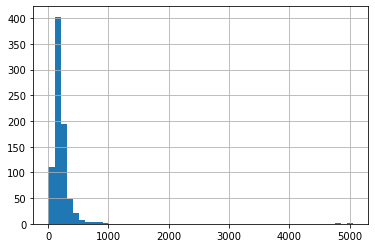

In [40]:
text = pd.read_csv('corrrect_dataset.csv')['News'].astype('str')
seq_len1 = [len(str(i).split()) for i in text]
pd.Series(seq_len1).hist(bins = 50)